In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('..\Initial_data\K5T3\K5T3_cor.csv', ";")
df

C:\Users\Graf_35\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.110403,4.224950,13.78617,4.584234,1.391578,312.5545,-40.092450,-39.37344,38.50135,55.80167,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.2933,3.947831,125.8089,272.8238
1,4.112575,4.227241,11.90175,3.316688,-0.645750,312.5571,-39.794660,-39.14466,38.05667,55.72771,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.3435,3.949697,125.8541,272.7920
2,4.113778,4.228291,10.79170,2.277516,-1.903453,312.5505,-40.097530,-39.45195,38.08927,55.77531,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.4133,3.949778,125.8552,272.5587
3,4.115534,4.230028,10.17877,1.721016,-2.264719,312.5371,-40.044270,-40.01524,38.10891,55.77896,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.4946,3.954266,125.7343,273.4935
4,4.119669,4.234331,10.18566,1.616016,-2.435016,312.5414,-39.671490,-38.28672,38.09208,55.95422,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.5350,3.957666,125.5335,273.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25914,4.160757,3.191344,313.74000,-39.790630,55.519060,157.6138,0.232187,28.33871,345.88870,14.23969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25915,4.159538,2.821219,313.84830,-39.492190,57.778440,157.5200,0.241875,28.28961,345.68440,14.24500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25916,4.158431,2.705062,313.86800,-40.997660,56.487810,157.4600,0.241875,28.29358,345.76310,14.24844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25917,4.157700,2.880281,313.82860,-40.635940,57.193750,157.4025,0.244688,28.26398,345.64130,14.22563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

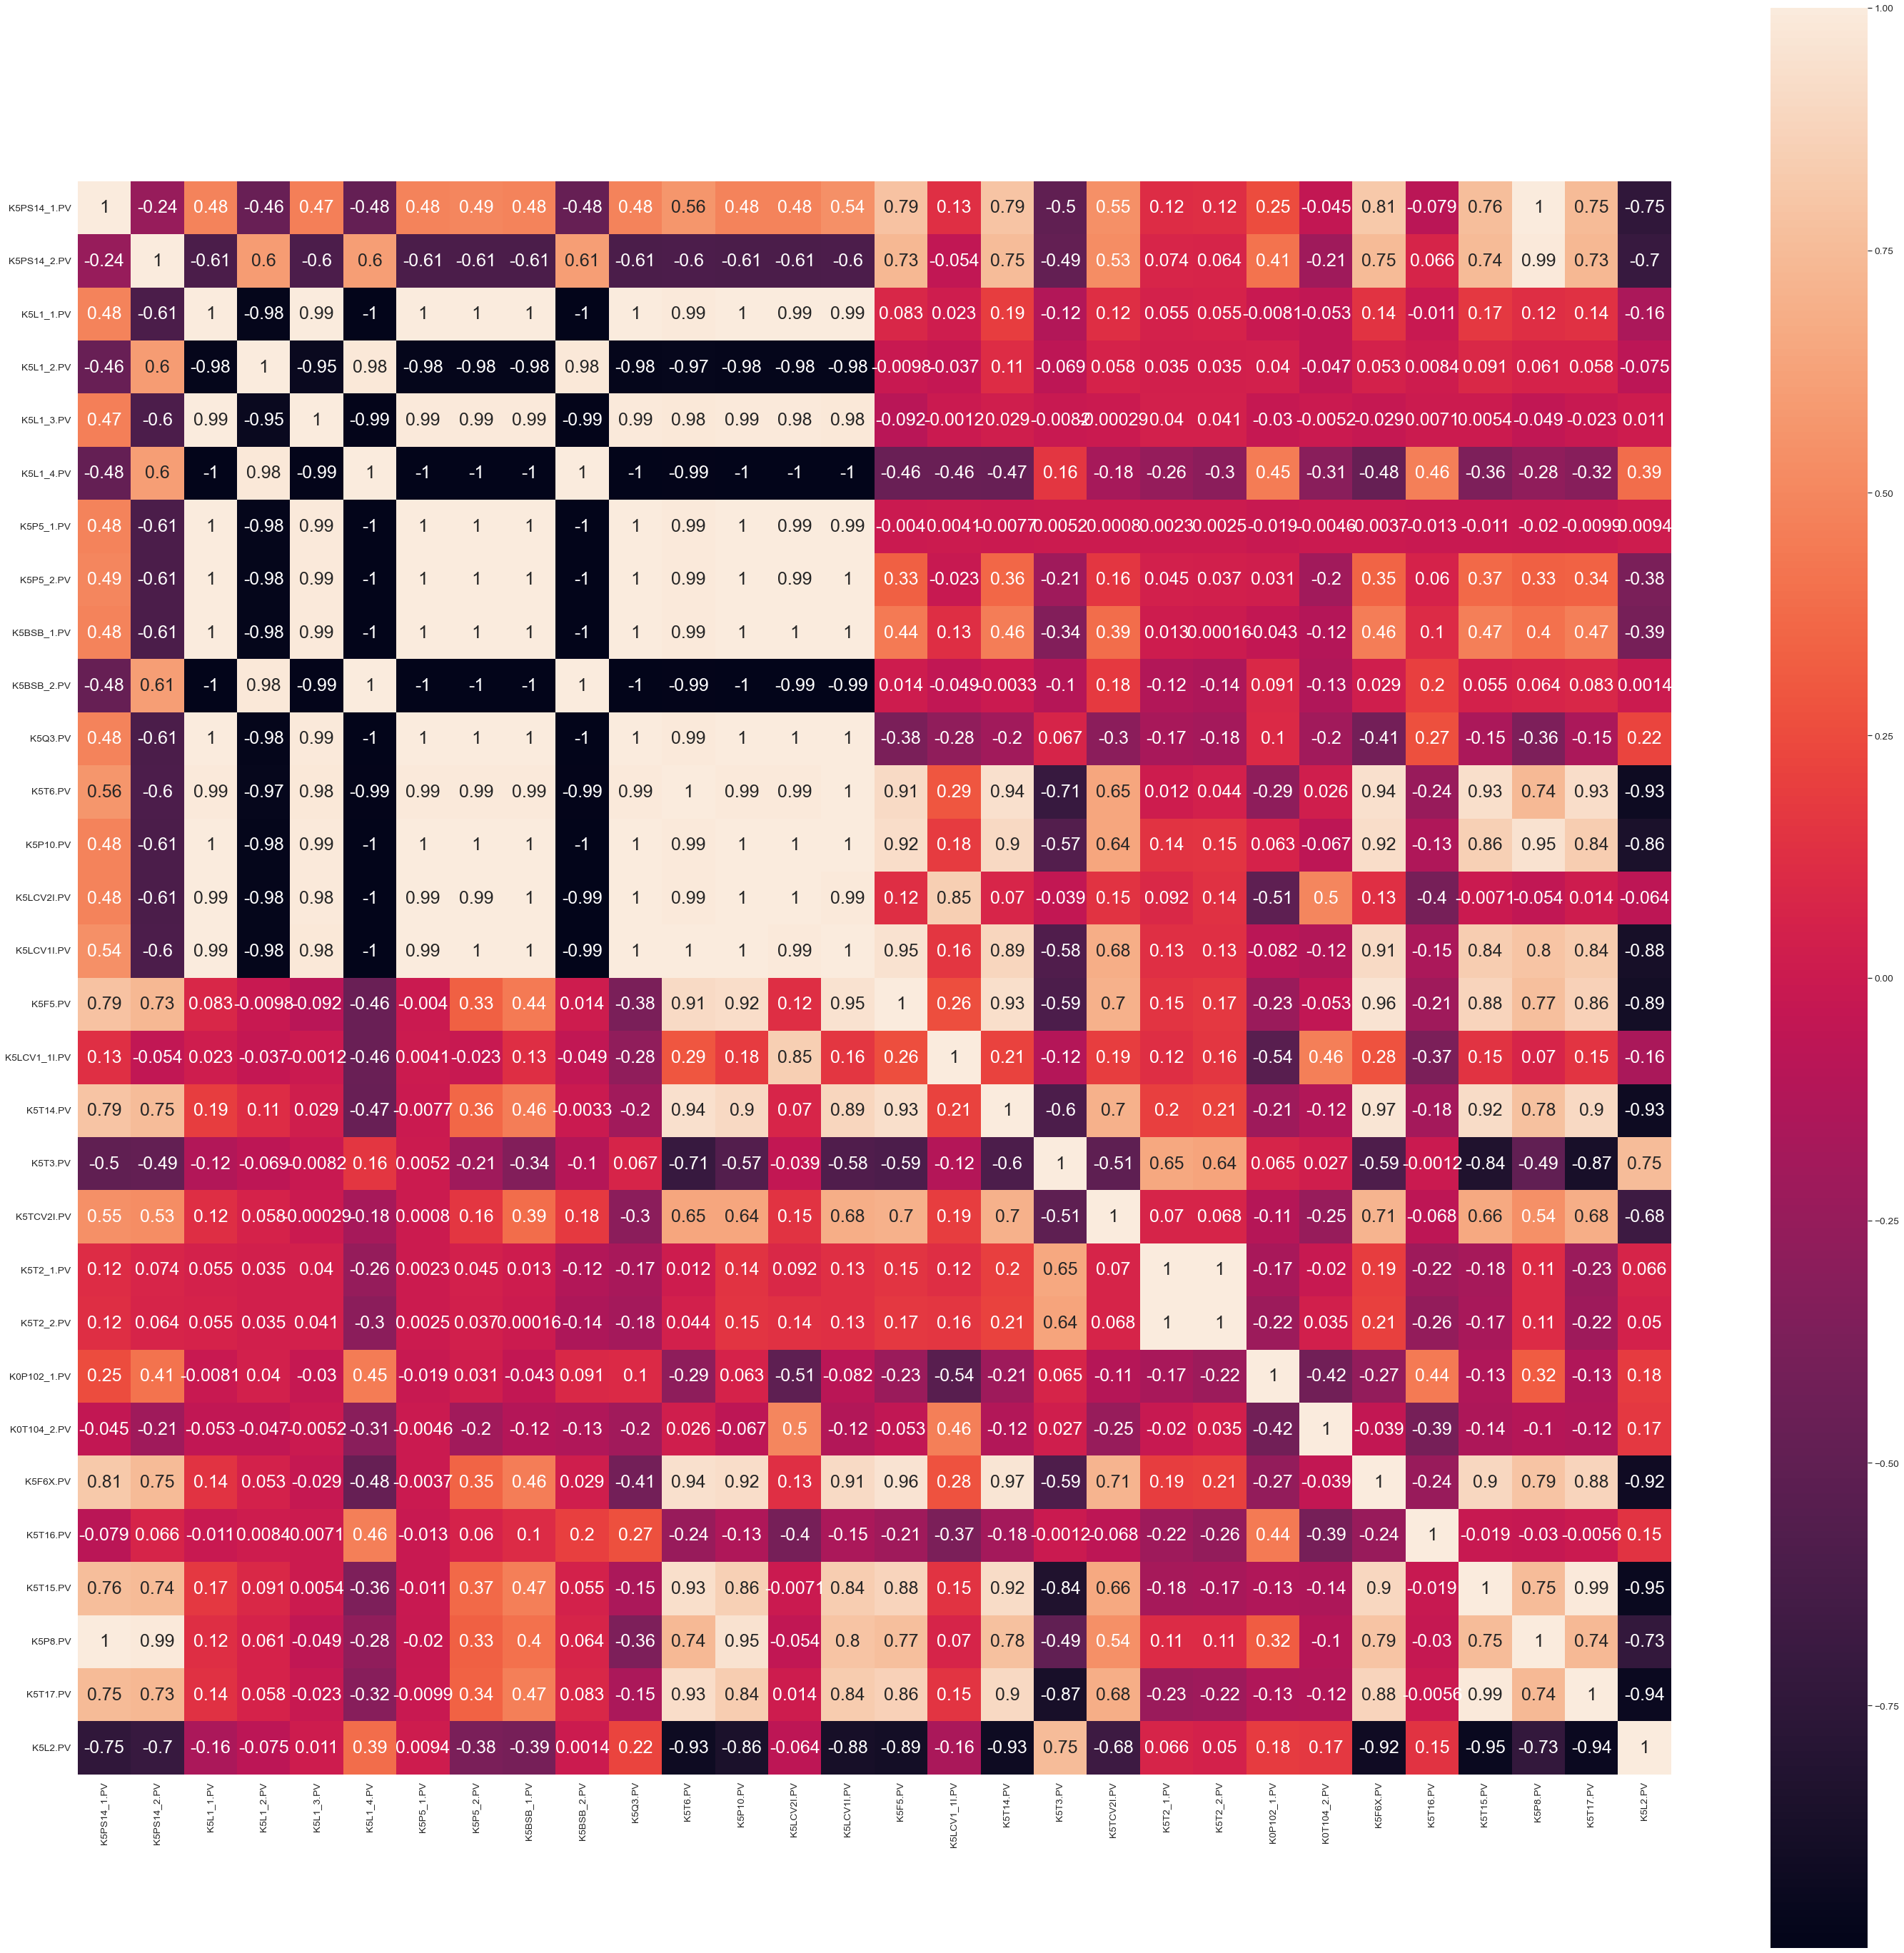

In [5]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [47]:
df = pd.read_csv('..\Initial_data\K5T3\K5T3.csv', ";")
df

C:\Users\Graf_35\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,K5T14.PV,K5T3.PV,K5TCV2I.PV,K5F6X.PV,K5T15.PV,K5P8.PV
0,370.3087,195.5198,47.39250,32.14036,114.15920,4.057631
1,370.2506,190.4175,26.76359,31.72066,123.31730,4.049337
2,370.1544,191.3656,46.41276,32.10343,114.49690,4.059038
3,370.0187,191.0869,26.75510,31.98566,123.92500,4.048937
4,369.9619,198.7044,44.63146,31.66335,114.14350,4.051347
...,...,...,...,...,...,...
24475,336.5856,200.9423,11.36594,18.73588,96.37417,3.894694
24476,336.5284,200.8479,11.36396,18.44797,96.39250,3.881991
24477,336.4044,200.8873,11.35589,18.51610,96.36125,3.882163
24478,336.3959,200.7010,11.35896,18.68910,96.35333,3.888438


In [48]:
df=df.dropna()
df=df.round(5)
#df=df.drop_duplicates(["K5T14.PV"])
df=df.drop_duplicates(["K5T3.PV"])
#df=df.drop_duplicates(["K5TCV2I.PV"])
#df=df.drop_duplicates(["K5F6X.PV"])
#df=df.drop_duplicates(["K5T15.PV"])
#df=df.drop_duplicates(["K5P8.PV"])
df

,K5T14.PV,K5T3.PV,K5TCV2I.PV,K5F6X.PV,K5T15.PV,K5P8.PV
0,370.3087,195.5198,47.39250,32.14036,114.15920,4.05763
1,370.2506,190.4175,26.76359,31.72066,123.31730,4.04934
2,370.1544,191.3656,46.41276,32.10343,114.49690,4.05904
3,370.0187,191.0869,26.75510,31.98566,123.92500,4.04894
4,369.9619,198.7044,44.63146,31.66335,114.14350,4.05135
...,...,...,...,...,...,...
24475,336.5856,200.9423,11.36594,18.73588,96.37417,3.89469
24476,336.5284,200.8479,11.36396,18.44797,96.39250,3.88199
24477,336.4044,200.8873,11.35589,18.51610,96.36125,3.88216
24478,336.3959,200.7010,11.35896,18.68910,96.35333,3.88844


In [25]:
y = df.drop(['K5T14.PV', 'K5TCV2I.PV', 'K5F6X.PV', 'K5T15.PV', 'K5P8.PV'], axis=1)
x = df.drop(['K5T3.PV', 'K5T14.PV', 'K5F6X.PV', 'K5T15.PV', 'K5P8.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(15, 50, 100)[:, np.newaxis]

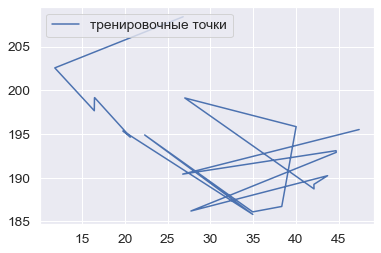

In [26]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

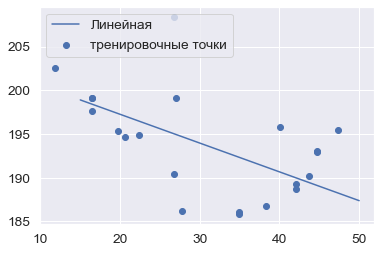

array([-38.37808921, -23.23905515])

In [27]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

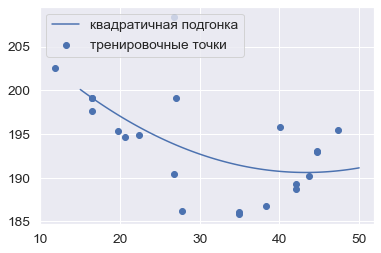

array([-38.37808921, -23.23905515])

In [28]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

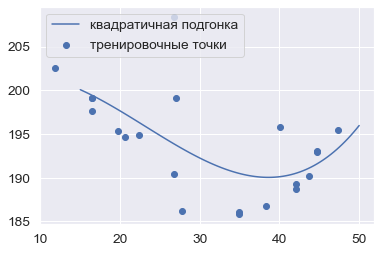

array([-38.37808921, -23.23905515])

In [29]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

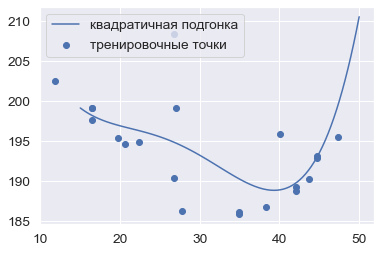

array([-38.37808921, -23.23905515])

In [30]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

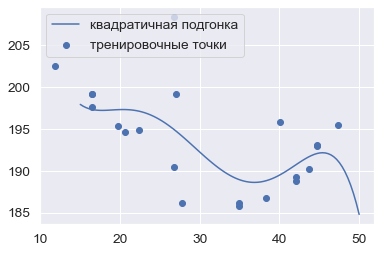

array([-38.37808921, -23.23905515])

In [31]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

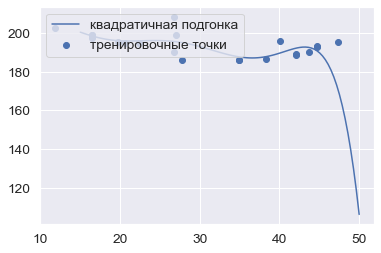

array([-38.37808921, -23.23905515])

In [32]:
pr_6 = LinearRegression()
Fig = PolynomialFeatures(degree=6)
X_6 = Fig.fit_transform(X_train)   
pr_6.fit(X_6, y_train)
y_pr_6 = pr_6.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_6, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_6, X_test, y_test, cv=2)

In [49]:
y = df.drop(['K5T14.PV', 'K5TCV2I.PV', 'K5F6X.PV', 'K5T15.PV', 'K5P8.PV'], axis=1)
x = df.drop(['K5T3.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(15, 50, 100)[:, np.newaxis]

In [50]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
#y_pr=clf.predict(task)
#plt.scatter(x, y, label = 'тренировочные точки') 
#plt.plot(task, y_pr, label = 'квадратичная подгонка') 
#plt.legend(loc='upper left') 
#plt.show()
clf.score(X_test, y_test)

0.8906208244860737

In [51]:
import pickle
filename = '../model/K5T3.sav'
pickle.dump(clf, open(filename, 'wb'))

In [52]:
loaded_model = pickle.load(open("../model/K5T3.sav", 'rb'))

In [53]:
task2 = {'K5T14.PV':[370.3087],
        'K5TCV2I.PV':[47.39],
        'K5F6X.PV':[32.14],
        'K5T15.PV':[114.1592],
        'K5P8.PV':[4.0576]}
df2 = pd.DataFrame(data=task2)
df2

,K5T14.PV,K5TCV2I.PV,K5F6X.PV,K5T15.PV,K5P8.PV
0,370.3087,47.39,32.14,114.1592,4.0576


In [54]:
loaded_model.predict(df2)

array([[200.24031863]])